# Iššūkis: Teksto analizė apie duomenų mokslą

Šiame pavyzdyje atliksime paprastą pratimą, apimantį visus tradicinio duomenų mokslo proceso etapus. Jums nereikia rašyti jokio kodo, galite tiesiog spustelėti žemiau esančias langelius, kad juos vykdytumėte ir stebėtumėte rezultatą. Kaip iššūkį, skatiname išbandyti šį kodą su skirtingais duomenimis.

## Tikslas

Šioje pamokoje aptarėme įvairias su duomenų mokslu susijusias sąvokas. Pabandykime atrasti daugiau susijusių sąvokų atlikdami **teksto gavybą**. Pradėsime nuo teksto apie duomenų mokslą, ištrauksime iš jo raktažodžius ir tada pabandysime vizualizuoti rezultatą.

Kaip tekstą naudosime Vikipedijos puslapį apie duomenų mokslą:


In [62]:
url = 'https://en.wikipedia.org/wiki/Data_science'

## 1 žingsnis: Duomenų gavimas

Pirmasis žingsnis kiekviename duomenų mokslo procese yra duomenų gavimas. Tam naudosime biblioteką `requests`:


In [63]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Data science - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"1a104647-90de-485a-b88a-1406e889a5d1","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Data_science","wgTitle":"Data science","wgCurRevisionId":1038046078,"wgRevisionId":1038046078,"wgArticleId":35458904,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: others","Articles with short description","Short description matches Wikidata","Use dmy dates from December 2012","Information science","Computer occupations"

## 2 žingsnis: Duomenų transformavimas

Kitas žingsnis – konvertuoti duomenis į formą, tinkamą apdorojimui. Mūsų atveju, mes atsisiuntėme HTML šaltinio kodą iš puslapio, ir turime jį paversti į paprastą tekstą.

Yra daug būdų, kaip tai galima padaryti. Mes naudosime paprasčiausią įmontuotą [HTMLParser](https://docs.python.org/3/library/html.parser.html) objektą iš Python. Reikia paveldėti `HTMLParser` klasę ir apibrėžti kodą, kuris surinks visą tekstą iš HTML žymių, išskyrus `<script>` ir `<style>` žymes.


In [64]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Data science - Wikipedia Data science From Wikipedia, the free encyclopedia Jump to navigation Jump to search Interdisciplinary field of study focused on deriving knowledge and insights from data Not to be confused with  information science . The existence of  Comet NEOWISE  (here depicted as a series of red dots) was discovered by analyzing  astronomical survey  data acquired by a  space telescope , the  Wide-field Infrared Survey Explorer . Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection AutoML Association rules Reinforcement learning Structured prediction Feature engineering Feature learning Online learning Semi-supervised learning Unsupervised learning Learning to rank Grammar induction Supervised learning ( classification  •  regression ) Decision trees Ensembles Bagging Boosting Random forest k -NN Linear regression Naive Bayes Artificial neural networks Logistic regression Perceptron Relevance vector machine 

## 3 žingsnis: Įžvalgų gavimas

Svarbiausias žingsnis yra paversti mūsų duomenis į formą, iš kurios galime gauti įžvalgų. Mūsų atveju, norime išgauti raktažodžius iš teksto ir pamatyti, kurie raktažodžiai yra reikšmingesni.

Naudosime Python biblioteką, vadinamą [RAKE](https://github.com/aneesha/RAKE), raktažodžių išgavimui. Pirmiausia, įdiekime šią biblioteką, jei ji dar nėra įdiegta:


In [65]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


Pagrindinė funkcija pasiekiama per `Rake` objektą, kurį galime pritaikyti naudodami tam tikrus parametrus. Mūsų atveju nustatysime minimalią raktažodžio ilgį - 5 simbolius, minimalią raktažodžio pasikartojimo dažnį dokumente - 3, o maksimalų žodžių skaičių raktažodyje - 2. Drąsiai eksperimentuokite su kitomis reikšmėmis ir stebėkite rezultatą.


In [66]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('machine learning', 4.0),
 ('big data', 4.0),
 ('data scientist', 4.0),
 ('21st century', 4.0),
 ('data science', 3.909090909090909),
 ('computer science', 3.909090909090909),
 ('information science', 3.797979797979798),
 ('data analysis', 3.666666666666667),
 ('application domains', 3.6),
 ('science', 1.9090909090909092),
 ('field', 1.25),
 ('statistics', 1.2272727272727273),
 ('classification', 1.2),
 ('techniques', 1.1666666666666667),
 ('datasets', 1.0),
 ('education', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('forbes', 1.0)]

Gavome sąrašą terminų kartu su jų svarbos laipsniu. Kaip matote, svarbiausios disciplinos, tokios kaip mašininis mokymasis ir didieji duomenys, yra sąrašo viršuje.

## 4 žingsnis: Rezultatų vizualizavimas

Žmonės geriausiai interpretuoja duomenis vizualine forma. Todėl dažnai verta vizualizuoti duomenis, kad būtų galima gauti tam tikrų įžvalgų. Galime naudoti `matplotlib` biblioteką Python kalboje, kad nupieštume paprastą raktinių žodžių pasiskirstymą pagal jų svarbą:


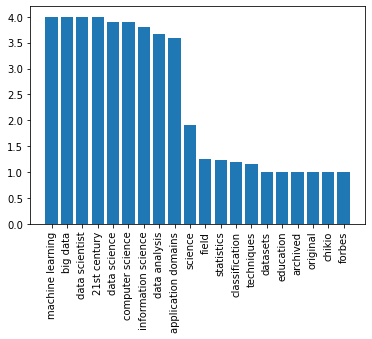

In [67]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

Yra, tačiau, dar geresnis būdas vizualizuoti žodžių dažnius - naudojant **Žodžių Debesį**. Mums reikės įdiegti kitą biblioteką, kad galėtume sudaryti žodžių debesį iš mūsų raktažodžių sąrašo.


In [71]:
!{sys.executable} -m pip install wordcloud

`WordCloud` objektas yra atsakingas už tai, kad priimtų arba originalų tekstą, arba iš anksto apskaičiuotą žodžių sąrašą su jų dažniais, ir grąžintų vaizdą, kurį vėliau galima parodyti naudojant `matplotlib`:


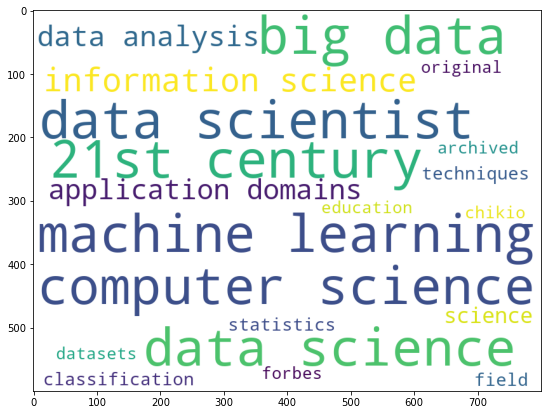

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

Mes taip pat galime perduoti pradinį tekstą į `WordCloud` - pažiūrėkime, ar galime gauti panašų rezultatą:


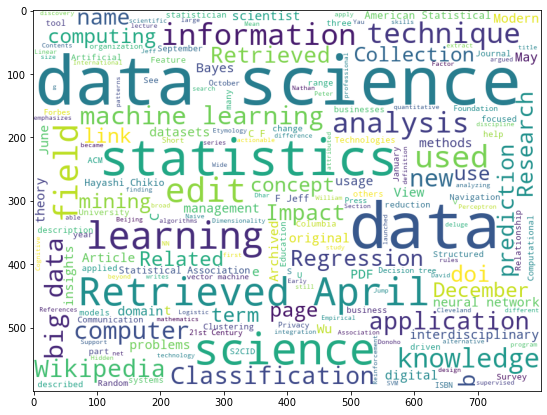

In [70]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

Dabar galite matyti, kad žodžių debesis atrodo įspūdingiau, tačiau jame taip pat yra daug triukšmo (pvz., nesusiję žodžiai, tokie kaip `Retrieved on`). Be to, gauname mažiau dviejų žodžių raktinių frazių, tokių kaip *duomenų mokslininkas* ar *kompiuterių mokslas*. Taip yra todėl, kad RAKE algoritmas daug geriau atrenka tinkamus raktinius žodžius iš teksto. Šis pavyzdys parodo, kaip svarbu tinkamai apdoroti ir išvalyti duomenis, nes aiškus vaizdas pabaigoje leis priimti geresnius sprendimus.

Šioje užduotyje mes perėjome paprastą procesą, kaip išgauti prasmę iš „Wikipedia“ teksto, naudojant raktinius žodžius ir žodžių debesį. Šis pavyzdys yra gana paprastas, tačiau jis gerai iliustruoja visus tipinius žingsnius, kuriuos duomenų mokslininkas atlieka dirbdamas su duomenimis – pradedant duomenų gavimu ir baigiant vizualizacija.

Mūsų kurse mes išsamiai aptarsime visus šiuos žingsnius.



---

**Atsakomybės apribojimas**:  
Šis dokumentas buvo išverstas naudojant AI vertimo paslaugą [Co-op Translator](https://github.com/Azure/co-op-translator). Nors siekiame tikslumo, prašome atkreipti dėmesį, kad automatiniai vertimai gali turėti klaidų ar netikslumų. Originalus dokumentas jo gimtąja kalba turėtų būti laikomas autoritetingu šaltiniu. Kritinei informacijai rekomenduojama naudoti profesionalų žmogaus vertimą. Mes neprisiimame atsakomybės už nesusipratimus ar klaidingus interpretavimus, atsiradusius dėl šio vertimo naudojimo.
